In [1]:
import matplotlib.pyplot as plt
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import env_v2
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
env = env_v2.DroneEnv()

episode_return = 0
state = env.reset()
print(env.get_angle(),env.get_angle2goal())


0 -0.7853981633974483


C:\ProgramData\anaconda3\envs\UAV\lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


[0.6283185307179586, 50, 50, 50, 50, 50, 50, 50, 50, 50, 1111.6214859864137, -0.15989416394840372]
[1.2566370614359172, 50, 50, 50, 50, 50, 50, 50, 50, 50, 1093.8131418851665, 0.4766796354246585]
[1.8849555921538759, 50, 50, 50, 50, 50, 50, 50, 50, 50, 1084.9775812661994, 1.1214686219392114]
[2.5132741228718345, 50, 50, 50, 50, 50, 50, 50, 50, 50, 1088.7162078303013, 1.7678649116935539]
[3.141592653589793, 50, 50, 50, 50, 50, 50, 50, 50, 50, 1103.4958002604233, 2.4084769127536676]
[3.7699111843077517, 50, 50, 50, 50, 50, 50, 50, 50, 50, 1123.3880242755613, 3.0386577662283543]
[4.39822971502571, 50, 50, 50, 50, 50, 50, 50, 50, 50, 1140.7347596315685, -2.6250024901035127]
[5.026548245743669, 50, 50, 50, 50, 50, 50, 50, 50, 50, 1149.1416924566522, -2.0125342330878055]
[5.654866776461628, 50, 50, 50, 50, 50, 50, 50, 50, 50, 1145.600279329575, -1.401371642271183]
[6.283185307179586, 50, 50, 50, 50, 50, 50, 50, 50, 50, 1131.370849898476, -0.7853981633974492]
[0.6283185307179586, 50, 50, 50, 

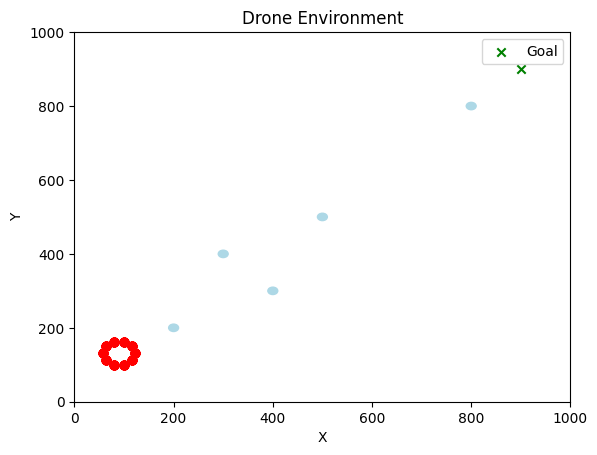

In [2]:
import matplotlib.pyplot as plt
import numpy as np

count = 0
done = False
r = 0

# 创建一张图
#plt.figure()

# 绘制目标点
plt.scatter(env.goal[0], env.goal[1], marker='x', color='green', label='Goal')

# 绘制障碍物
for k in env.obstacles:
    obstacle_circle = plt.Circle(k, env.r_obstacles, color='lightblue', fill=True)
    plt.gca().add_patch(obstacle_circle)

# 设置坐标轴范围
plt.xlim(env.space1.low[0], env.space1.high[0])
plt.ylim(env.space1.low[1], env.space1.high[1])

# 添加标签和标题
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Drone Environment')

# 主循环
while not done:
    count += 1
    env.render(mode='human')
    action = 2
    next_state, reward, done, info = env.step(action)
    print(state)
    r += reward
    state = next_state
    if count > 300:
        done = True

# 显示图
plt.show()


## 测试距离传感器

In [4]:
import math

class Drone:
    def __init__(self, x, y, heading):
        self.x = x
        self.y = y
        self.heading = heading  # 初始航向角
        self.sensor_range = 50  # 传感器范围

    def update_position(self, x, y):
        self.x = x
        self.y = y

    def distance_to_obstacle(self, obs_x, obs_y, obs_radius):
        return math.sqrt((self.x - obs_x)**2 + (self.y - obs_y)**2) - obs_radius

    def sensor_reading(self, obs):
        min_distance = self.sensor_range  # 初始化为传感器范围的最大值

        for obstacle in obs:
            obs_x, obs_y, obs_radius = obstacle
            distance_to_obstacle = self.distance_to_obstacle(obs_x, obs_y, obs_radius)

            # 计算无人机到障碍物的相对方向角
            relative_angle = math.atan2(obs_y - self.y, obs_x - self.x)

            # 计算无人机航向角与相对方向角之间的差异
            angle_diff = self.angle_difference(self.heading, relative_angle)

            # 如果差异在传感器角度范围内，并且距离在传感器范围内
            if abs(angle_diff) < math.radians(15) and 0 <= distance_to_obstacle < self.sensor_range:
                # 计算障碍物在传感器方向上的投影距离
                projected_distance = abs(distance_to_obstacle / math.cos(angle_diff))

                # 更新最小距离
                min_distance = min(min_distance, projected_distance)

        # 如果没有检测到障碍物，则返回最大距离
        return min_distance if min_distance < self.sensor_range else self.sensor_range

    def angle_difference(self, angle1, angle2):
        # 计算两个角度之间的差异（返回值范围：[-pi, pi]）
        diff = (angle2 - angle1 + math.pi) % (2 * math.pi) - math.pi
        return diff

# 示例用法
drone = Drone(x=0, y=0, heading=math.radians(45))  # 初始化无人机
obs_list = [(2, 2, 1), (4, 0, 1)]  # 障碍物列表，每个元素为 (x, y, radius)

# 模拟更新无人机位置
drone.update_position(1, 1)

# 获取传感器读数
sensor_reading = drone.sensor_reading(obs_list)

print(sensor_reading)  # 打印传感器读数
